## Configuracion

In [2]:
# RECUERDEN SUBIR TODAS LAS IMAGENES QUE USARAN EN UNA CARPETA LLAMADA 'Imagenes'.
# El codigo utiliza cameraman por default, pero pueden usar cualquier imagen que les parezca apropiadas.

from scipy import ndimage
from skimage import filters
from skimage import util
import skimage.io as io

import matplotlib.pyplot as plt
import numpy as np

import os

## Ejemplo de uso de skimage

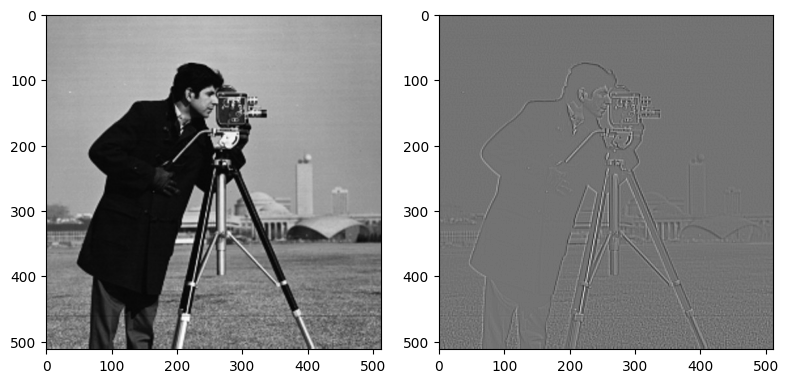

In [3]:
# Indicamos el camino a la imagen
imagenFilename = os.path.join("./content/Imagenes", 'cameraman.jpg')

# Abrimos la imagen indicando que es en escala de gris
imagenPrueba = io.imread(imagenFilename, as_gray=True)

"""
  Creamos nuestro kernel para convolucionar sobre la imagen con numpy.
  Cada array sera una columna de nuestro kernel, por lo que [[-1,2,-3],[-3,7,3],[-4,5,-6]] sera:

                      | -1 -3 -4 |
                      |  2  7  5 |
                      | -3  3 -6 |

  Recordar que en la convolucion se rota el kernel, por lo que se estaria convolucionando con:

                      | -6  3 -3 |
                      |  5  7  2 |
                      | -4 -3 -1 |
 """
kernelPrueba = np.array([[-1,2,-3],[-3,7,3],[-4,5,-6]], dtype=np.int16)

# Para que no causar errores numericos, asegurense que el tipo de dato del kernel y la imagen coincidan
# En este caso usaremos int de 16 bits con signo porque los numeros del kernel son chicos.
# Y el resultado de la convolucion no deberia pasarse de [-32,767, 32,767]
# Si se pasara habria overflow y la imagen apareceria muy ruidosa
imagenPruebaInt16 = imagenPrueba.astype(np.int16)

#Realizamos la convolucion
imagenConvolucionada = ndimage.convolve(imagenPruebaInt16, kernelPrueba)

# Normalizamos la imagen y la volvemos a setear en el rango [0,255]. Con el rango acotado volvemos a convertirlo en uint8
maximoValor = np.max(imagenConvolucionada)
minimoValor = np.min(imagenConvolucionada)
imagenConvolucionadaNormalizada = np.trunc(((imagenConvolucionada - minimoValor) / maximoValor - minimoValor) * 255).astype(np.uint8)

# Mostramos el resultado final
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

# Usamos imshow para graficar imagenes, utilizando el cmap plt.cm.gray para especificar que esta en escala de grises
ax[0].imshow(imagenPrueba, cmap=plt.cm.gray)
ax[1].imshow(imagenConvolucionada, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()


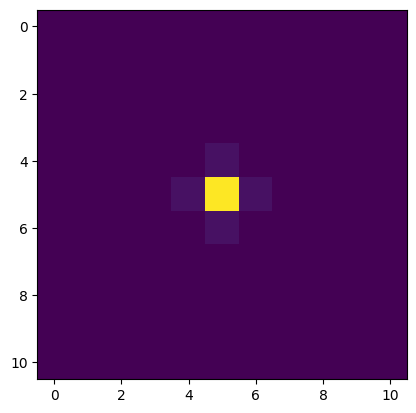

In [4]:
# Aplicacion de una mascara gausseana utilizando skimage
# Pueden ver mas mascaras de skimage en https://scikit-image.org/docs/stable/api/skimage.filters.html
a = np.zeros((11, 11))
a[5, 5] = 1
ejemplo = filters.gaussian(a, sigma=0.4)
plt.imshow(ejemplo)


# **Deteccion de Borde por Metodo de Gradiante**


## **1)** Implemente los operadores de Roberts, Prewitt y Sobel

### Sobel

In [4]:
def binarizador(img , umbral):
    imagen2 = img
    # si umbral es 0, devuelvo la imagen sin binarizar (sodel comun)
    if (umbral != 0):

        # hago una mascara de los pixeles que estan por arriba del umbral
        # a los que estan por encima les asigno el nivel de gris 255 y a los que no los dejo en 0 
        imagen2 = ((np.ones(img.shape)*umbral)<=img) * 255
        return imagen2
    
    return imagen2


In [5]:
def gradiente(imagen, umbral, matrizdx, matrizdy):
    imagenNorm = imagen/255
    dxconv = ndimage.convolve(imagenNorm,matrizdx)
    dyconv = ndimage.convolve(imagenNorm,matrizdy)
    
    res = np.sqrt(dxconv**2+dyconv**2)
    
    res = binarizador(res, umbral)
    return res

In [6]:
def Sobel(image, thresholdBorde):
  dysobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  #dysobel = dysobel/np.sum(np.abs(dysobel))
  dxsobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  #dxsobel = dxsobel/np.sum(np.abs(dxsobel))
  
  res = gradiente(image,thresholdBorde,dxsobel,dysobel)
  return res

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[156 158 160 ... 152 152 152]
 [156 157 158 ... 151 151 151]
 [159 157 155 ... 152 151 151]
 ...
 [120 123 125 ... 120 111 112]
 [120 124 127 ... 123 112 108]
 [121 123 126 ... 121 114 113]]


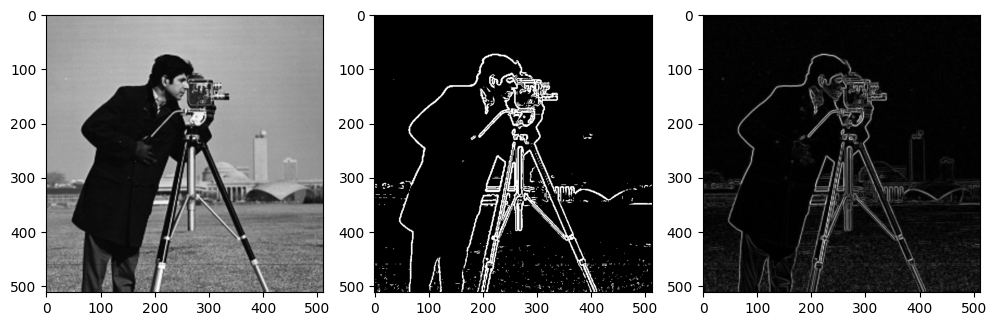

In [7]:
imagenFilename = os.path.join("./content/Imagenes", 'cameraman.jpg')
imagenPrueba = io.imread(imagenFilename, as_gray=True)

imagenBordes = Sobel(imagenPrueba, 0.66)
imagenBordesSkiImg = filters.sobel(imagenPrueba)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

print(imagenBordes)
print(imagenPrueba)

axes[0].imshow(imagenPrueba, cmap=plt.cm.gray)
axes[1].imshow(imagenBordes, cmap=plt.cm.gray)
axes[2].imshow(imagenBordesSkiImg, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()


### Prewitt

In [8]:
def Prewitt(image, thresholdBorde):
  dxprewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
  dyprewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  
  res = gradiente(image,thresholdBorde,dxprewitt,dyprewitt)

  return res

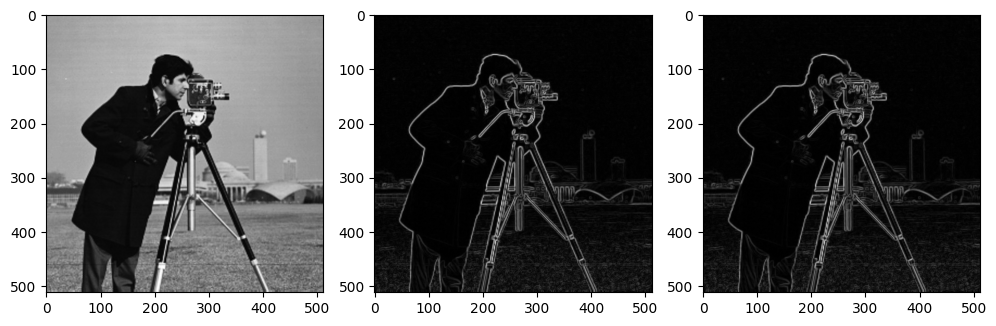

In [9]:
imagenFilename = os.path.join("./content/Imagenes", 'cameraman.jpg')
imagenPrueba = io.imread(imagenFilename, as_gray=True)

imagenBordes = Prewitt(imagenPrueba, 0)
imagenBordesSkiImg = filters.prewitt(imagenPrueba)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

axes[0].imshow(imagenPrueba, cmap=plt.cm.gray)
axes[1].imshow(imagenBordes, cmap=plt.cm.gray)
axes[2].imshow(imagenBordesSkiImg, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

### Roberts

In [10]:
def Roberts(image, thresholdBorde):
  dxroberts = np.array([[0,1],[-1,0]])
  dyroberts = np.array([[1,0],[0,-1]])
  
  res = gradiente(image,thresholdBorde,dxroberts,dyroberts)

  return res

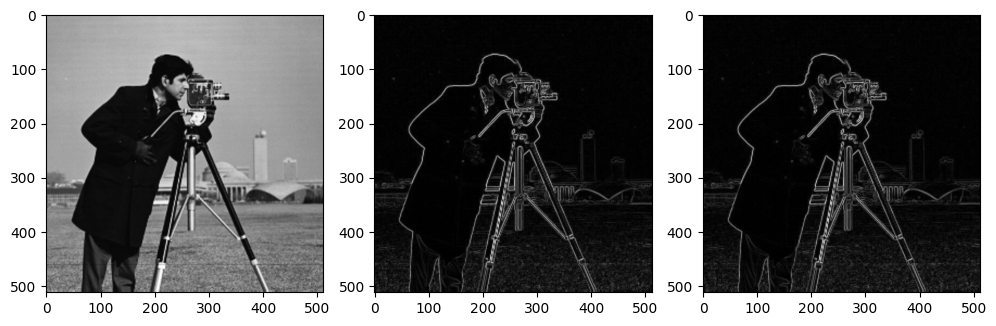

In [11]:
imagenFilename = os.path.join("./content/Imagenes", 'cameraman.jpg')
imagenPrueba = io.imread(imagenFilename, as_gray=True)

imagenBordes = Roberts(imagenPrueba, 0)
imagenBordesSkiImg = filters.roberts(imagenPrueba)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

axes[0].imshow(imagenPrueba, cmap=plt.cm.gray)
axes[1].imshow(imagenBordes, cmap=plt.cm.gray)
axes[2].imshow(imagenBordesSkiImg, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

# **Metodo Laplaciano**

Implementen el metodo de deteccion de bordes utilizando el operador Laplaciano con y sin chequeo de la varianza total

In [18]:
def zerocrossign(imagen):
    imagenSigno = np.sign(imagen)
    res = np.zeros(imagen.shape)
    for i in range(imagenSigno.shape[0]):
        for j in range(imagenSigno.shape[1]):
            if (i != 0 ):
                if(imagenSigno[i-1,j] != imagenSigno[i,j]):
                    #res[i-1,j] = 1
                    res[i,j] = 1
            if (j != 0 ):
                if(imagenSigno[i,j-1] != imagenSigno[i,j]):
                    #res[i,j-1] = 1
                    res[i,j] = 1
    return res

In [33]:
def LaplacianoSinVarianzaLocal(imagen):
  imagenNorm = imagen
  laplaciano = np.array([[0,1,0],[1,-4,1],[0,1,0]])
  matrizL = ndimage.convolve(imagenNorm, laplaciano)
  Z = np.zeros(imagenNorm.shape)    
  matrizZC = zerocrossign(matrizL)
  U = np.ones(imagenNorm.shape)  
  res = 255 * matrizZC 
  print(matrizL)
  print(res)
  return res

Usualmente puede haber artefactos por causa de ruido que aparecen como bordes en la imagen resultante luego del operador Laplaciano, consecuencia de ser muy fragil contra el ruido agregado a la imagen original.

Por esta misma razon agregamos un paso mas a nuestro filtro, al realizar zero crossing tambien chequearemos la varianza local del pixel en la imagen original, ya que un punto de borde deberia encontrarse en posiciones de gran variabilidad.

In [26]:
def LaplacianoConVarianzaLocal(imagen, umbralVar):
  imagenNorm = imagen
  filtromed = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
  medias = ndimage.convolve(imagenNorm, filtromed)
  
  
  n = imagenNorm.shape[0]
  m = imagenNorm.shape[1]
  rango = np.arange(-1,1)
  varianza = np.zeros(imagenNorm.shape)
  
  for u in range(n):
    for v in range(m):
      suma = 0
      for i in rango:
        for j in rango:
          val = (imagenNorm[u,v]-medias[u+i,v+j])**2
          suma += val
      varianza[u,v] = suma / 9

  laplaciano = np.array([[0,1,0],[1,-4,1],[0,1,0]])
  matrizL = ndimage.convolve(imagenNorm, laplaciano)  #Matriz de Laplacianos
  
  Zeros = np.zeros(imagenNorm.shape)    
  Unos = np.ones(imagenNorm.shape)  
  matrizZC = zerocrossign(matrizL)           #Matriz de Zero-Crossing (CHEQUEAR EQUAL)

  varFiltrada = varianza > umbralVar
  
  res = Unos * 255 * matrizZC  * varFiltrada
  return res

[[ 0.00516406 -0.00186613 -0.00698763 ... -0.00108192 -0.00107629
  -0.00118811]
 [ 0.0028243   0.00104318 -0.00128924 ...  0.0015126   0.00192677
   0.00199496]
 [-0.00419674  0.00109663  0.00497703 ...  0.00034887  0.00151291
   0.00254337]
 ...
 [ 0.01020651  0.00152246  0.00041166 ...  0.00328738  0.01649062
   0.01380353]
 [ 0.00625729  0.00028099  0.00252751 ... -0.00029564  0.01354381
   0.01696278]
 [ 0.00539126  0.0011274   0.00410915 ...  0.00090924  0.00824219
   0.00823832]]
[[  0. 255.   0. ...   0.   0.   0.]
 [  0. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255.   0.   0.]
 ...
 [  0. 255. 255. ... 255.   0.   0.]
 [  0.   0.   0. ... 255. 255.   0.]
 [  0.   0.   0. ... 255.   0.   0.]]


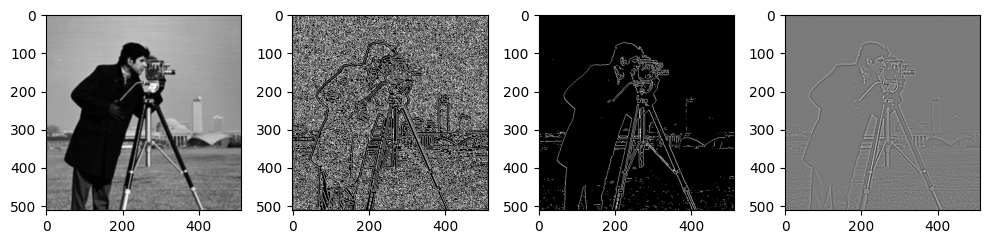

In [36]:
imagenFilename = os.path.join("./content/Imagenes", 'cameraman.jpg')
imagenPrueba = io.imread(imagenFilename, as_gray=True)
imagenPrueba = filters.gaussian(imagenPrueba)

imagenSinVar = LaplacianoSinVarianzaLocal(imagenPrueba)
imagenConVar = LaplacianoConVarianzaLocal(imagenPrueba,0.0005)

imagenLaplace= filters.laplace(imagenPrueba)

fig, axes = plt.subplots(1, 4, figsize=(10, 10))

axes[0].imshow(imagenPrueba, cmap=plt.cm.gray)
axes[1].imshow(imagenSinVar, cmap=plt.cm.gray)
axes[2].imshow(imagenConVar, cmap=plt.cm.gray)
axes[3].imshow(imagenLaplace, cmap=plt.cm.gray)


fig.tight_layout()
plt.show()

## Ruidos

El ruido es una señal no deseada que se mezcla con una señal útil en cualquier sistema de comunicación o proceso. En procesamiento de imagenes nos enfocaremos pricipalmente en ruido Gausseano y Rayleigh, los dos causados por los sensores utilizados en la obtencion de imagenes y con una funcion de probabilida clara.

### Ruido Gausseano

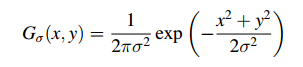

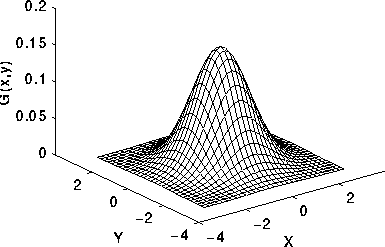

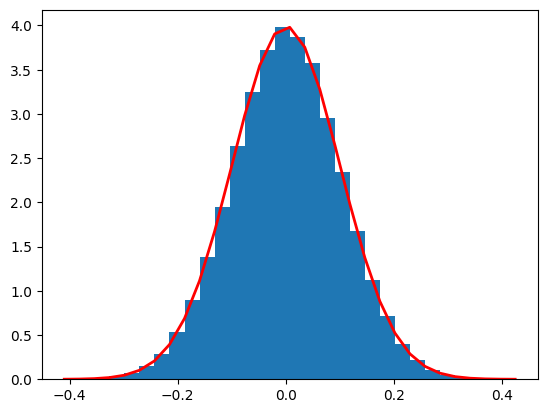

In [24]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 100000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

### Ruido Rayleigh

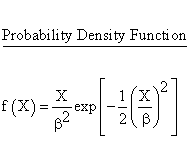


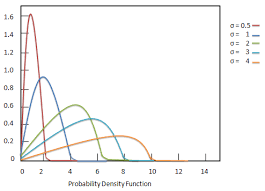

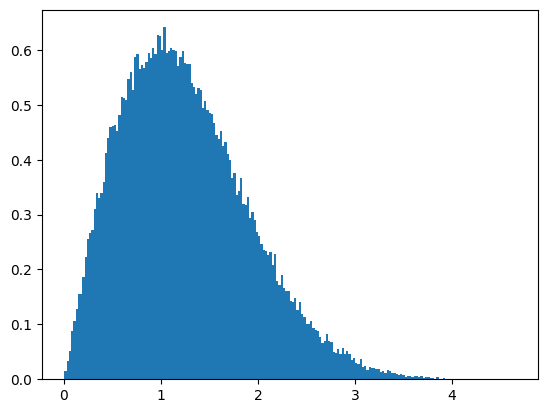

In [25]:
plt.hist(np.random.rayleigh(1, 100000), bins=200, density=True)
plt.show()

## Ruido y el operador Laplaciano

Comparen que sucede con los bordes detectados segun la cantidad y el tipo de ruidos que se encuentra en la imagen. ¿Por que creen que sucenden estos cambios?

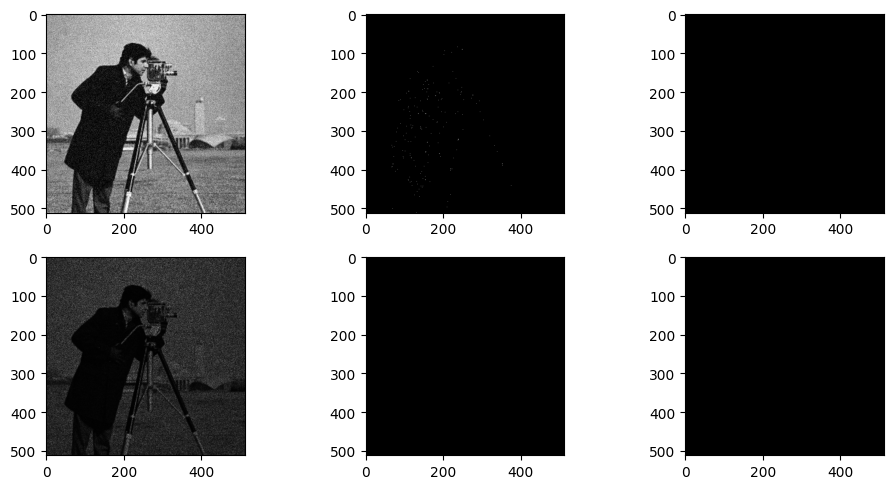

In [27]:
imagenFilename = os.path.join("./content/Imagenes", 'cameraman.jpg')
imagenPrueba = io.imread(imagenFilename, as_gray=True)

# Agregamos ruido Gausseano Aditivo
ImagenConRuidoGausseano = util.random_noise(imagenPrueba, mode='gaussian', mean=0, var=0.01)

#Agregamos ruido Rayleigh Multiplicativo
imagenConRayleigh =  imagenPrueba * np.random.rayleigh(0.2, imagenPrueba.shape)

# Aunque ya no estamos trabajando con imagenes del rango [0,255], nuestros metodos seguiran funcionando
# Ya que todas nuestras tecnicas son generales sobre cualquier señal de 2 dimensiones.

fig, axes = plt.subplots(2, 3, figsize=(10, 5))

axes[0][0].imshow(ImagenConRuidoGausseano, cmap=plt.cm.gray)
axes[0][1].imshow(LaplacianoSinVarianzaLocal(ImagenConRuidoGausseano), cmap=plt.cm.gray)
axes[0][2].imshow(LaplacianoConVarianzaLocal(ImagenConRuidoGausseano,0.2), cmap=plt.cm.gray)

axes[1][0].imshow(imagenConRayleigh, cmap=plt.cm.gray)
axes[1][1].imshow(LaplacianoSinVarianzaLocal(imagenConRayleigh), cmap=plt.cm.gray)
axes[1][2].imshow(LaplacianoConVarianzaLocal(imagenConRayleigh,0.2), cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

# **Realce de Bordes**

### Implementar un realce de bordes utilizando Unsharp Masking

In [ ]:
def SharpImage(image):
  return image

### Vean como evoluciona la imagen luego de varias operaciones de Sharpening. Hagan el experimento agregando Ruido Gausseana, Rayleigh y Salt and Pepper

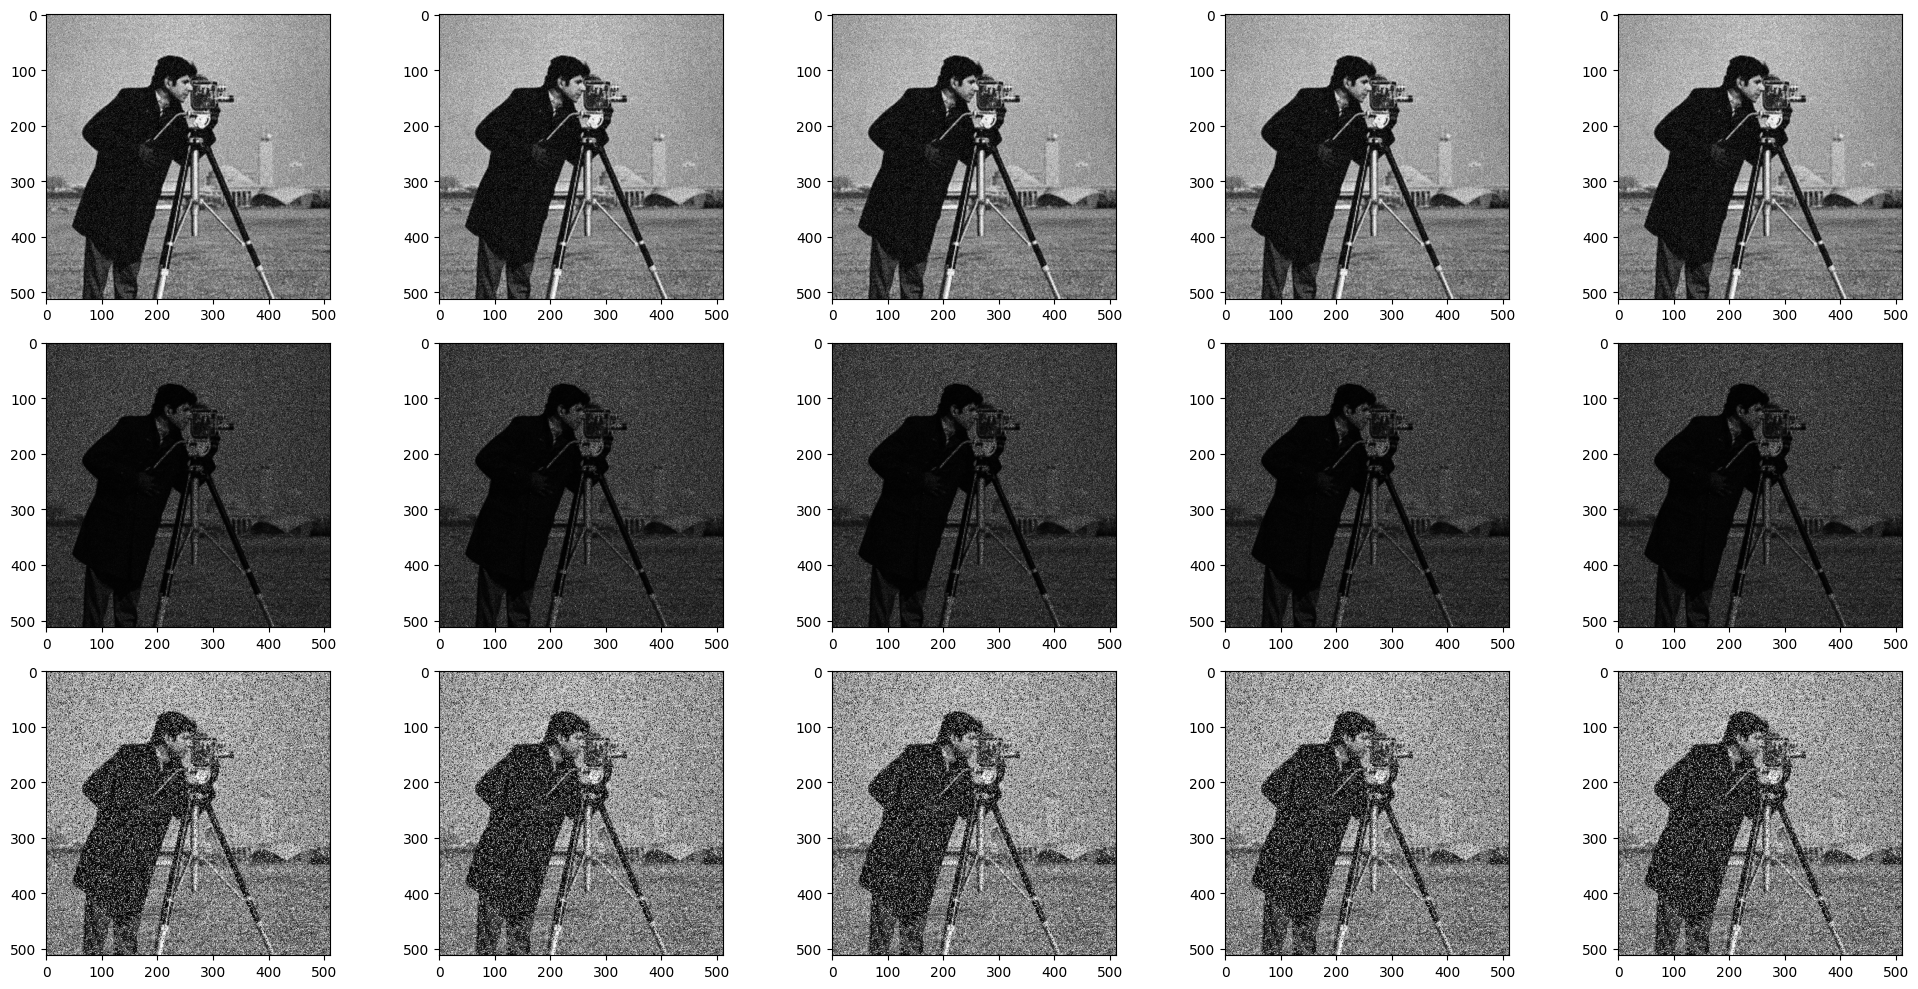

In [ ]:
aplicacionesSucesivas = 4

imagenFilename = os.path.join("/content/Imagenes", 'cameraman.jpg')
imagenPrueba = io.imread(imagenFilename, as_gray=True)

# Agregamos ruido Gausseano Aditivo
ImagenConRuidoGausseano = util.random_noise(imagenPrueba, mode='gaussian', mean=0, var=0.01)
#Agregamos ruido Rayleigh Multiplicativo
imagenConRayleigh =  imagenPrueba * np.random.rayleigh(0.2, imagenPrueba.shape)
# Agregamos ruido Gausseano Aditivo
ImagenConSaltAndPepper = util.random_noise(imagenPrueba, mode='s&p', amount=0.3)

fig, axes = plt.subplots(3, aplicacionesSucesivas + 1, figsize=(20, 10))

axes[0][0].imshow(ImagenConRuidoGausseano, cmap=plt.cm.gray)
imagenAAplicar = ImagenConRuidoGausseano
for i in range(aplicacionesSucesivas):
  imagenSharp = SharpImage(imagenAAplicar)
  axes[0][i+1].imshow(imagenSharp, cmap=plt.cm.gray)
  imagenAAplicar = imagenSharp

axes[1][0].imshow(imagenConRayleigh, cmap=plt.cm.gray)
imagenAAplicar = imagenConRayleigh
for i in range(aplicacionesSucesivas):
  imagenSharp = SharpImage(imagenAAplicar)
  axes[1][i+1].imshow(imagenSharp, cmap=plt.cm.gray)
  imagenAAplicar = imagenSharp

axes[2][0].imshow(ImagenConSaltAndPepper, cmap=plt.cm.gray)
imagenAAplicar = ImagenConSaltAndPepper
for i in range(aplicacionesSucesivas):
  imagenSharp = SharpImage(imagenAAplicar)
  axes[2][i+1].imshow(imagenSharp, cmap=plt.cm.gray)
  imagenAAplicar = imagenSharp

fig.tight_layout()
plt.show()


# **Implementacion de Canny**

**Paper Original**: https://www.researchgate.net/publication/224377985_A_Computational_Approach_To_Edge_Detection

**Video Util**: https://www.youtube.com/watch?v=hUC1uoigH6s

Implemente el algoritmo de canny, explique cada una de sus partes y muestre los resultados de forma parecida a la muestra de resultados de un paper, pueden utlizar como referencia el codigo en este collab para mostrar sus resultados. Hagan un analisis cambiando los parametros del filtro Gausseano y comparando los resultados ¿que se esta perdiendo? ¿Por que?

In [ ]:
def canny(imagen):
  # Aplicacion de la mascara Gausseana
  # skimage.filters.gaussian

  # Adquirir el gradiante de la imagen y el angulo de borde
  # Truncar los angulos de borde de la imagen en 0, 45, 98, 135
  # Aplicar la eliminacion de no maximos, achicando el grosor de los bordes a uno
  # aplican histeresis para obtener los bordes finales